In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [150]:
data = pd.read_csv('IPL2016.csv')
data

,Unnamed: 0,overall_sr,won
0,1,168.817204,1
1,2,165.432099,0
2,3,121.568627,0
3,4,149.541284,1
4,5,151.898734,0
5,6,124.489796,0
6,7,112.000000,0
7,8,178.688525,1
8,9,150.000000,1
9,10,91.176471,0


In [151]:
data = data.drop(columns=['Unnamed: 0'])
data

,overall_sr,won
0,168.817204,1
1,165.432099,0
2,121.568627,0
3,149.541284,1
4,151.898734,0
5,124.489796,0
6,112.000000,0
7,178.688525,1
8,150.000000,1
9,91.176471,0


In [152]:
X = np.array(data['overall_sr']).reshape(-1,1)
y = np.array(data['won']).reshape(-1,1)

In [153]:
X.shape

(16, 1)

In [154]:
y.shape

(16, 1)

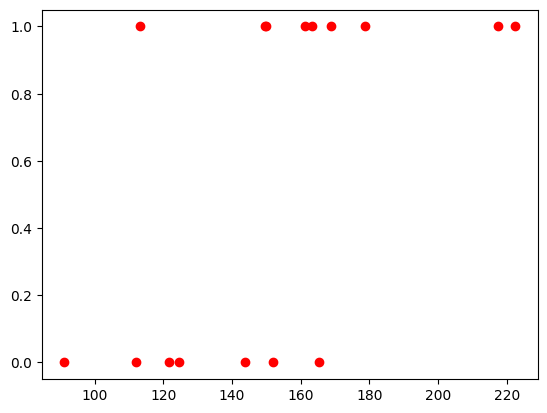

In [155]:
plt.scatter(X,y,c='r')

In [156]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))


def logistic_regression(X, y, learning_rate, epochs):
  X = (X - np.min(X))/(np.max(X) - np.min(X))
  n_samples,n_features = X.shape
  weights = np.zeros((n_features,1))
  bias = np.zeros((1, 1))
  print(n_samples)
  print(n_features)

  for i in range(epochs):
            z = np.dot(X, weights) + bias
            y_pred = sigmoid(z)
            dw = -np.dot(X.T, (y - y_pred)) / n_samples
            db = -np.sum(y - y_pred) / n_samples
            weights -= learning_rate* dw
            bias -= learning_rate* db
            if (dw**2 + db**2)**0.5 < 1e-3:
                break

  return weights, bias

In [157]:
w,b = logistic_regression(X, y, learning_rate=0.001, epochs=100000)
print(w)
print(b)

16
1
[[3.53365269]]
[[-1.28522191]]


In [158]:
X = np.array(data['overall_sr']).reshape(-1,1)
y = np.array(data['won']).reshape(-1,1)

In [159]:
 def predict_prob(strike):
    X_normalized = (strike - np.min(X)) / (np.max(X) - np.min(X))
    z = np.dot(X_normalized, w) + b
    return sigmoid(z)

In [160]:
predict_prob(0)

array([[0.02320502]])

In [165]:
predict_prob(100)

array([[0.25967246]])

In [161]:
predict_prob(150)

array([[0.57406271]])

In [164]:
predict_prob(200)

array([[0.8381551]])

In [162]:
X_test = np.linspace(X.min(),250, 100).reshape(-1, 1)
y_prob = predict_prob(X_test)

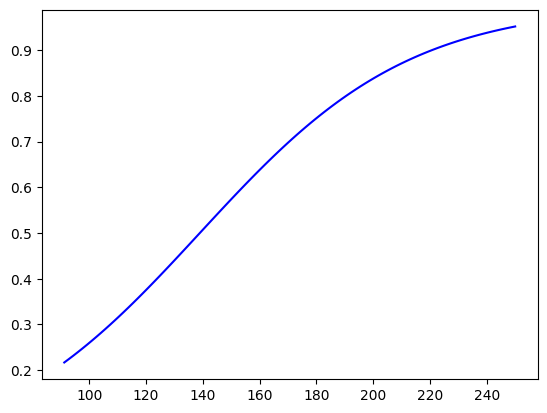

In [163]:
plt.plot(X_test, y_prob, color='blue', label='Logistic Regression Curve')
plt.show()